# Titanic Machine Learning Solution

1. Collecting Data
2. Data Exploration
3. Feature Engineering
4. Model building
5. Testing

## 1. Collecting Data

In [202]:
import pandas as pd

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 2. Data Exploration

In [203]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [207]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [209]:
train.shape

(891, 12)

In [210]:
test.shape

(418, 11)

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked=True,figsize=(5,3))

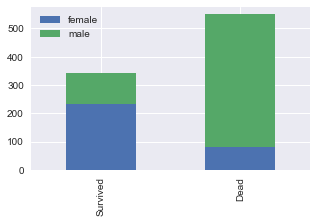

In [213]:
bar_chart('Sex')

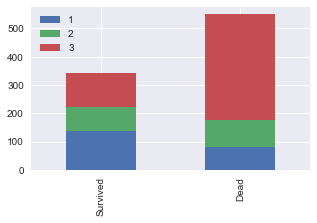

In [214]:
bar_chart('Pclass')

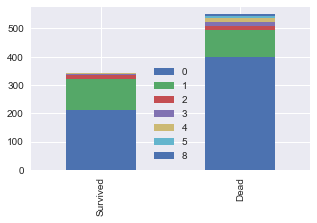

In [215]:
bar_chart('SibSp')

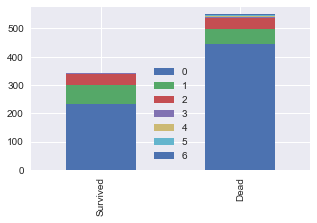

In [216]:
bar_chart('Parch')

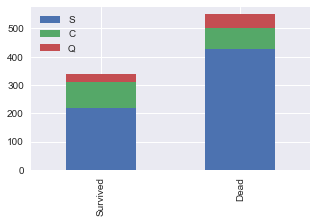

In [217]:
bar_chart('Embarked')

## Feature Engineering

In [218]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Title mapping

In [219]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [220]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [221]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [222]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [223]:
mapping = {'Mr': 0, 'Mrs': 1, 'Miss':2, 'Ms':2, 'Master':3}
for dataset in [train, test]:
    dataset['TitleClass'] = dataset['Title'].map(mapping)
    dataset['TitleClass'].fillna(4, inplace=True)

In [224]:
train.TitleClass.unique()

array([ 0.,  1.,  2.,  3.,  4.])

In [225]:
test.TitleClass.unique()

array([ 0.,  1.,  2.,  3.,  4.])

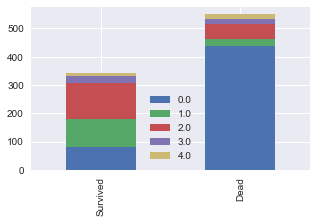

In [226]:
bar_chart('TitleClass')

In [227]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.0


In [228]:
train.drop(['Name', 'Title'], axis=1, inplace = True)
test.drop(['Name', 'Title'], axis=1, inplace = True)

In [229]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleClass
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# Sex mapping

In [230]:
sex_mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [231]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleClass
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


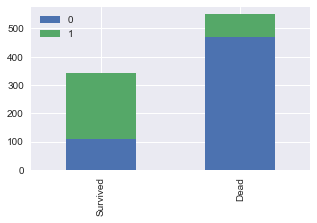

In [232]:
bar_chart('Sex')

# Age

In [233]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
TitleClass       0
dtype: int64

### 1 Filling Age na

In [234]:
#train['Age'].fillna(train.groupby(['TitleClass','Pclass'])['Age'].transform('median'), inplace = True)
#test['Age'].fillna(test.groupby(['TitleClass','Pclass'])['Age'].transform('median'), inplace = True)

train['Age'].fillna(train.groupby(['TitleClass'])['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby(['TitleClass'])['Age'].transform('median'), inplace = True)

In [235]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
TitleClass       0
dtype: int64

In [236]:
import seaborn as sns
sns.set()

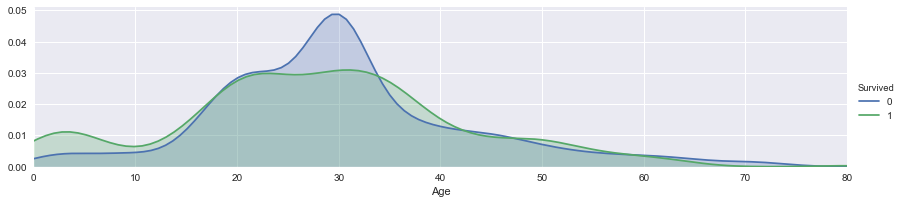

In [237]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

### 2 Age Binning

0: Child (0,17)
1: Young (17, 25)
2: Adult (25, 33)
3: Mid-Age (33, 60)
4: Senior (60, 82)

In [238]:
for dataset in [train, test]:
    dataset.loc[dataset['Age']<=17, 'AgeClass'] = 0
    dataset.loc[(dataset['Age']>17) & (dataset['Age']<=25), 'AgeClass'] = 1
    dataset.loc[(dataset['Age']>25) & (dataset['Age']<=33), 'AgeClass'] = 2
    dataset.loc[(dataset['Age']>33) & (dataset['Age']<=60), 'AgeClass'] = 3
    dataset.loc[dataset['Age']>60, 'AgeClass'] = 4

In [239]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleClass,AgeClass
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1.0,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1.0,3.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0,3.0


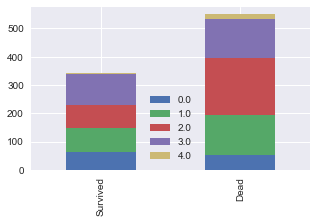

In [240]:
bar_chart('AgeClass')

## Embarked

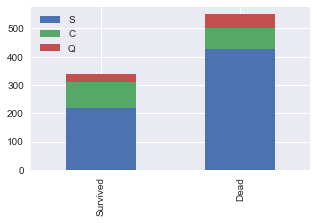

In [241]:
bar_chart('Embarked')

In [242]:
for dataset in [train, test]:
    dataset['Embarked'].fillna('S', inplace = True)

In [243]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
TitleClass       0
AgeClass         0
dtype: int64

In [244]:
map_embark = {'S':0, 'C':1, 'Q':2}
for dataset in [train, test]:
     dataset['Embarked'] = dataset['Embarked'].map(map_embark)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleClass,AgeClass
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,1.0,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,1.0,3.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0,3.0


## Fare

In [245]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

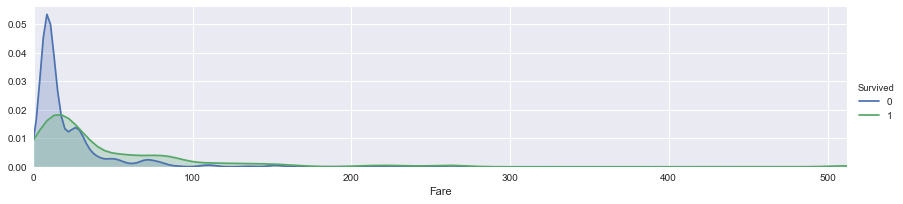

In [246]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

### Fare Binning
0: low (0,17)
1: med (17,28)
2: med_high (28, 100)
3: high (100, 500)

In [247]:
for dataset in [train, test]:
    dataset.loc[dataset['Fare'] <= 17, 'FareClass'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 28), 'FareClass'] = 1
    dataset.loc[(dataset['Fare'] > 28) & (dataset['Fare'] <= 100), 'FareClass'] = 2
    dataset.loc[dataset['Fare'] > 100, 'FareClass'] = 3

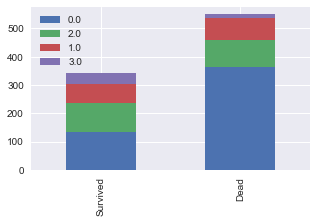

In [248]:
bar_chart('FareClass')

In [249]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleClass,AgeClass,FareClass
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0,1.0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,1.0,3.0,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0,2.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,1.0,3.0,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0,3.0,0.0


## Cabin

In [250]:
train['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

In [251]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [252]:
test.shape

(418, 13)

In [253]:
test['Cabin'].isnull().sum()

327

In [254]:
train.shape

(891, 14)

In [255]:
train['Cabin'].isnull().sum()

687

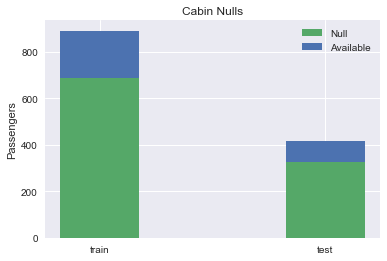

In [256]:
import numpy as np

null_train = train['Cabin'].isnull().sum()
null_test = test['Cabin'].isnull().sum()
p2 = plt.bar(np.arange(2), [train.shape[0], test.shape[0]],0.35)
p1 = plt.bar(np.arange(2), [null_train, null_test],0.35)

plt.ylabel('Passengers')
plt.title('Cabin Nulls')
plt.xticks(np.arange(2), ('train', 'test'))
plt.legend((p1[0], p2[0]), ('Null', 'Available'))

plt.show()

### Family

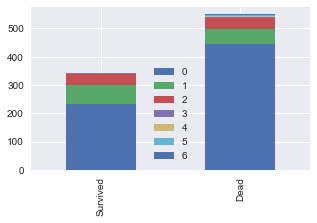

In [257]:
bar_chart('Parch')

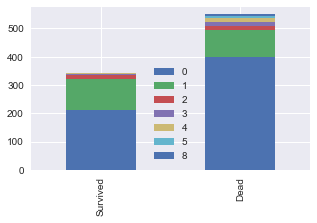

In [258]:
bar_chart('SibSp')

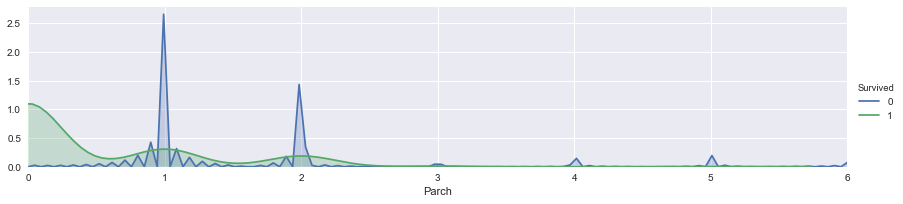

In [259]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Parch', shade = True)
facet.set(xlim=(0, train['Parch'].max()))
facet.add_legend()
plt.show()

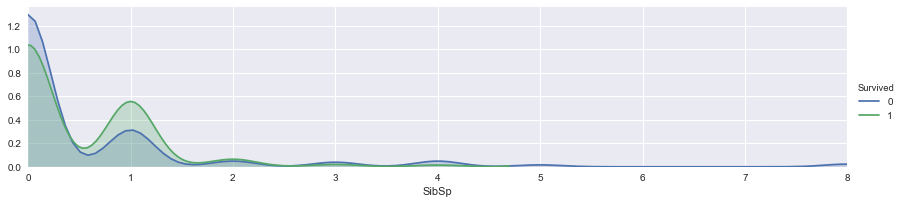

In [260]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'SibSp', shade = True)
facet.set(xlim=(0, train['SibSp'].max()))
facet.add_legend()
plt.show()

In [261]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleClass,AgeClass,FareClass
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0,1.0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,1.0,3.0,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2.0,2.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,1.0,3.0,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0,3.0,0.0


In [262]:
drop_features = ['Age', 'Ticket', 'Fare', 'Cabin']
train.drop(drop_features, axis = 1, inplace = True)
test.drop(drop_features, axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,TitleClass,AgeClass,FareClass
0,1,0,3,0,1,0,0,0.0,1.0,0.0
1,2,1,1,1,1,0,1,1.0,3.0,2.0
2,3,1,3,1,0,0,0,2.0,2.0,0.0
3,4,1,1,1,1,0,0,1.0,3.0,2.0
4,5,0,3,0,0,0,0,0.0,3.0,0.0


In [263]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,TitleClass,AgeClass,FareClass
0,892,3,0,0,0,2,0.0,3.0,0.0
1,893,3,1,1,0,0,1.0,3.0,0.0
2,894,2,0,0,0,2,0.0,4.0,0.0
3,895,3,0,0,0,0,0.0,2.0,0.0
4,896,3,1,1,1,0,1.0,1.0,0.0


# 4. Model Building

In [264]:
target = train['Survived']
train_data = train.drop(['Survived','PassengerId'], axis = 1)

In [265]:
train_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,TitleClass,AgeClass,FareClass
0,3,0,1,0,0,0.0,1.0,0.0
1,1,1,1,0,1,1.0,3.0,2.0
2,3,1,0,0,0,2.0,2.0,0.0
3,1,1,1,0,0,1.0,3.0,2.0
4,3,0,0,0,0,0.0,3.0,0.0


In [266]:
train_data.shape

(891, 8)

In [267]:
target.shape

(891L,)

In [268]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [269]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Embarked      891 non-null int64
TitleClass    891 non-null float64
AgeClass      891 non-null float64
FareClass     891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


### Cross Validation K-fold

In [270]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state=0)

In [271]:
clf = KNeighborsClassifier(n_neighbors=4)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[ 0.8         0.85393258  0.84269663  0.87640449  0.88764045  0.7752809
  0.7752809   0.78651685  0.75280899  0.80898876]
81.6


In [272]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[ 0.8         0.83146067  0.76404494  0.84269663  0.8988764   0.78651685
  0.79775281  0.80898876  0.78651685  0.76404494]
80.81


In [293]:
clf = RandomForestClassifier(max_features= 6, n_estimators= 4)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[ 0.74444444  0.84269663  0.80898876  0.83146067  0.88764045  0.84269663
  0.82022472  0.80898876  0.7752809   0.7752809 ]
81.38


In [274]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[ 0.82222222  0.75280899  0.76404494  0.7752809   0.73033708  0.79775281
  0.79775281  0.83146067  0.82022472  0.80898876]
79.01


In [275]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[ 0.82222222  0.79775281  0.82022472  0.80898876  0.84269663  0.80898876
  0.82022472  0.83146067  0.84269663  0.85393258]
82.49


### GridSearch

In [284]:
from sklearn.model_selection import GridSearchCV

In [287]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

In [288]:
clf = SVC()
grid_search = GridSearchCV(clf, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(train_data,target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [289]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 3}

# 5. Testing

In [276]:
clf = SVC()
clf.fit(train_data, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [278]:
test_data = test.drop('PassengerId', axis = 1)
test_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,TitleClass,AgeClass,FareClass
0,3,0,0,0,2,0.0,3.0,0.0
1,3,1,1,0,0,1.0,3.0,0.0
2,2,0,0,0,2,0.0,4.0,0.0
3,3,0,0,0,0,0.0,2.0,0.0
4,3,1,1,1,0,1.0,1.0,0.0


In [279]:
prediction = clf.predict(test_data)

In [282]:
submission = pd.DataFrame(
{
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})
submission.to_csv('submission.csv',index=False)

In [283]:
sub_test = pd.read_csv('submission.csv')
sub_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
